In [57]:
import numpy as np
from numpy import linspace
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn import tree
from sklearn import datasets
from sklearn.datasets import load_boston, load_breast_cancer, load_iris
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [58]:
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [59]:
print(boston.data.shape)

(506, 13)


In [60]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [61]:
bos = pd.DataFrame(boston.data)

In [62]:
bos.head()

0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33

In [63]:
#1
tar = pd.DataFrame(boston.target)

In [64]:
tar.head()

0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2

In [65]:
X_train, X_test, y_train, y_test = train_test_split(bos, tar, test_size=0.2, random_state=42)

In [66]:
print(bos.shape[0])

506


In [67]:
print(float(X_train.shape[0]) / float(bos.shape[0]))

0.7984189723320159


In [68]:
print(float(X_test.shape[0]) / float(bos.shape[0]))

0.2015810276679842


In [69]:
#2
reg = LinearRegression().fit(X_train, y_train)

In [70]:
Y_pred = reg.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

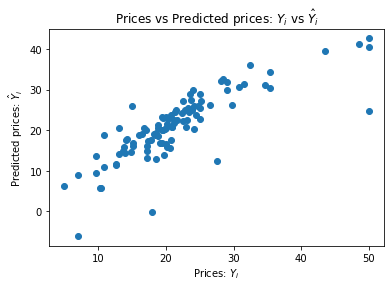

In [71]:
plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [72]:
#3
mean_squared_error(y_test, Y_pred)

24.291119474973456

In [73]:
#4
reg.score(X_test, y_test, sample_weight=None)

0.6687594935356329

In [74]:
scaler = StandardScaler()
scaler.fit(bos)

StandardScaler()

In [75]:
bos_norm = scaler.transform(bos)
bos_norm = pd.DataFrame(bos_norm)

In [76]:
bos_norm

0         1         2         3         4         5         6  \
0   -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1   -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2   -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3   -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4   -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.413229 -0.487722  0.115738 -0.272599  0.158124  0.439316  0.018673   
502 -0.415249 -0.487722  0.115738 -0.272599  0.158124 -0.234548  0.288933   
503 -0.413447 -0.487722  0.115738 -0.272599  0.158124  0.984960  0.797449   
504 -0.407764 -0.487722  0.115738 -0.272599  0.158124  0.725672  0.736996   
505 -0.415000 -0.487722  0.115738 -0.272599  0.158124 -0.362767  0.434732   

            7         8         9        10        11        12  
0    0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  
1    0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  
2    0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  
3    1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  
4    1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  
..        ...       ...       ...       ...       ...       ...  
501 -0.625796 -0.982843 -0.803212  1.176466  0.387217 -0.418147  
502 -0.716639 -0.982843 -0.803212  1.176466  0.441052 -0.500850  
503 -0.773684 -0.982843 -0.803212  1.176466  0.441052 -0.983048  
504 -0.668437 -0.982843 -0.803212  1.176466  0.403225 -0.865302  
505 -0.613246 -0.982843 -0.803212  1.176466  0.441052 -0.669058  

[506 rows x 13 columns]

In [77]:
polynomial_features = PolynomialFeatures(degree=2)

In [78]:
bos_transform = polynomial_features.fit_transform(bos_norm)

In [79]:
X_train_transform, X_test_transform, y_train, y_test = train_test_split(bos_transform, tar, test_size=0.2, random_state=42)

In [80]:
reg_transform    = LinearRegression().fit(X_train_transform, y_train)
Y_pred_transform = reg_transform.predict(X_test_transform)

In [81]:
mean_squared_error(y_test, Y_pred_transform)

14.259599581132916

In [82]:
reg_transform.score(X_test_transform, y_test, sample_weight=None)

0.8055521075469616

In [83]:
#5
clf = Lasso(alpha=1.0)

In [84]:
clf.fit(X_train_transform, y_train)

Lasso()

In [85]:
clf_pred = clf.predict(X_test_transform)

In [86]:
clf.score(X_test_transform, y_test)

0.735213747415629

In [87]:
mean_squared_error(y_test, clf_pred)

19.417777630856772

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 980.3870060163805, tolerance: 3.509685514851485
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 755.1943886713657, tolerance: 3.509685514851485
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266.9523281617835, tolerance: 3.509685514851485
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarnin

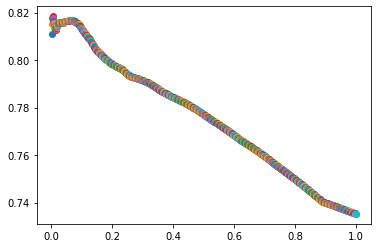

In [88]:
for a in linspace(0.001, 1, num=1000):
    clf = Lasso(alpha=a)
    clf.fit(X_train_transform, y_train)
    plt.scatter(a, clf.score(X_test_transform, y_test))

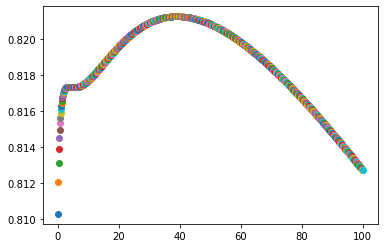

In [89]:
#6
for a in linspace(0.1, 100, num=1000):
    clf = Ridge(alpha=a)
    clf.fit(X_train_transform, y_train)
    plt.scatter(a, clf.score(X_test_transform, y_test))

In [90]:
#7
breast_cancer = load_breast_cancer()

In [91]:
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [92]:
#7.1
y = pd.DataFrame(breast_cancer.target)
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [93]:
X.isnull().all().all()

False

In [94]:
X

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [95]:
#7.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
#7.3
logistic = LogisticRegression(penalty='l1', C=1.0, random_state=0, solver='liblinear').fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [97]:
logistic.score(X_test, y_test)

0.956140350877193

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

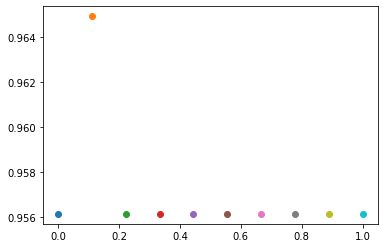

In [98]:
#7.4
for c in linspace(0.0001, 1, num=10):
    log_l2 = LogisticRegression(penalty='l2', C=c, random_state=0, solver='liblinear').fit(X_train, y_train)
    plt.scatter(c,log_l2.score(X_test, y_test))

In [99]:
#8
iris = datasets.load_iris()

In [100]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [101]:
features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

In [102]:
k = 3

neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(features_train, labels_train)

KNeighborsClassifier(n_neighbors=3)

In [103]:
predictions = neigh.predict(features_test)

In [104]:
output = accuracy_score(labels_test, predictions)

In [105]:
print(output)

1.0


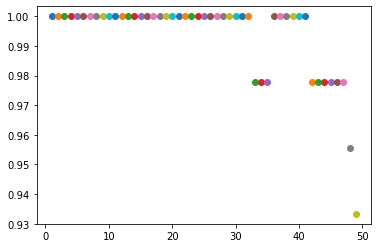

In [106]:
k_opt     = 0
score_otp = 0

for k in range(1, 50, 1):
    neigh = KNeighborsClassifier(n_neighbors=k).fit(features_train, labels_train)
    sc    = neigh.score(features_test, labels_test)
    plt.scatter(k, sc)
    if score_otp < sc:
        k_opt     = k
        score_otp = sc

In [107]:
print(f'Optimal k = {k_opt} with acc = {score_otp*100}%')

Optimal k = 1 with acc = 100.0%


In [108]:
#9
iris  = load_iris()
DEPTH = 10
clf   = tree.DecisionTreeClassifier(max_depth=DEPTH, random_state=0).fit(iris.data, iris.target)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

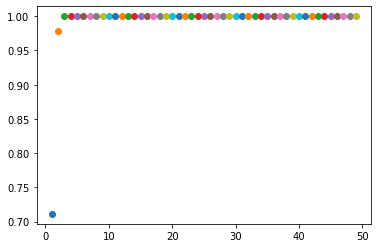

In [110]:
depth_opt = 0
score_otp = 0
for DEPTH in range(1, 50, 1):
    clf = tree.DecisionTreeClassifier(max_depth=DEPTH, random_state=0).fit(X_train, y_train)
    sc = clf.score(X_test, y_test)
    plt.scatter(DEPTH, sc)
    if score_otp < sc:
        depth_opt = DEPTH
        score_otp = sc

In [111]:
print(f'Optimal depth = {depth_opt} with acc = {score_otp*100}%')

Optimal depth = 3 with acc = 100.0%
